In [ ]:
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm_notebook as tqdm

from notebook_utils.constants import NEW_GENRES
from notebook_utils.feature_reduction import FeatureReducer
from notebook_utils.predictions import Predictor
from notebook_utils.utils import setup_axis, create_cmap

%load_ext autoreload
%autoreload 2

tqdm.pandas()

fr = FeatureReducer(ngrams=True, general=True, lexical=True)
p = Predictor(loader=fr.loader)

# Show Loaded Data

In [2]:
fr.loader.show_model_df("Unigram")

In [3]:
fr.loader.show_model_df("Bigram")

In [4]:
fr.loader.show_model_df("POS")

In [5]:
fr.loader.show_model_df("Lex")

In [6]:
fr.loader.show_model_df("LexG")

In [7]:
fr.loader.show_model_df("Nonlex")

In [8]:
fr.loader.show_model_df("NonlexG")

In [9]:
fr.loader.show_model_df("Phrasal")

In [10]:
fr.loader.show_model_df("Roget")

In [11]:
fr.loader.show_model_df("WordNet")

In [12]:
fr.loader.show_model_df("LIWC")

In [13]:
fr.loader.show_model_df("NRC")

# Train Models

In [14]:
no_reduc_accs = []

### Unigram

In [15]:
unigram_acc, uni_weights = p.predict_success(fr.loader.unigram_df, "Unigram", add_to_acc=no_reduc_accs, disp_weights=False)

### Bigram

In [16]:
bigram_acc, bigram_weights = p.predict_success(fr.loader.bigram_df, "Bigram", add_to_acc=no_reduc_accs, disp_weights=False)

### POS

In [17]:
pos_acc, pos_weights = p.predict_success(fr.loader.pos_df_scaled, "POS", add_to_acc=no_reduc_accs, disp_weights=False)

### Phrasal

In [48]:
phrasal_acc, phrasal_weights = p.predict_success(fr.loader.phrasal_df_scaled, "Phrasal", disp_weights=True)

### $\Gamma$ (lexicalized production rules)

In [18]:
lex_acc, lex_weights = p.predict_success(fr.loader.lex_df_scaled, "$\Gamma$", add_to_acc=no_reduc_accs, disp_weights=False)

### $\Gamma^G$ (lexicalized production rules, prepended with grandparent node)

In [19]:
lexg_acc, lexg_weights = p.predict_success(fr.loader.lexg_df_scaled, "$\Gamma^G$", add_to_acc=no_reduc_accs, disp_weights=False)

### $\gamma$ (nonlexicalized production rules)

In [20]:
nonlex_acc, nonlex_weights = p.predict_success(fr.loader.nonlex_df_scaled, "$\gamma$", add_to_acc=no_reduc_accs, disp_weights=False)

### $\gamma^G$ (nonlexicalized production rules, prepended with grandparent node)

In [21]:
nonlexg_acc, nonlexg_weights = p.predict_success(fr.loader.nonlexg_df_scaled, "$\gamma^G$", add_to_acc=no_reduc_accs, disp_weights=False)

### Roget

In [22]:
roget_acc, roget_weights = p.predict_success(fr.loader.roget_df_scaled, "Roget", add_to_acc=no_reduc_accs, disp_weights=False)

### WordNet

In [23]:
wordnet_acc, wordnet_weights = p.predict_success(fr.loader.wordnet_df_scaled, "WordNet", add_to_acc=no_reduc_accs, disp_weights=False)

### LIWC

In [24]:
liwc_acc, liwc_weights = p.predict_success(fr.loader.liwc_df_scaled, "LIWC", add_to_acc=no_reduc_accs, disp_weights=False)

### NRC Sentiment Emotion Lexicons

In [25]:
nrc_acc, nrc_weights = p.predict_success(fr.loader.nrc_df_scaled, "NRC Sentiment", add_to_acc=no_reduc_accs, disp_weights=False)

# Perform Feature Reduction

### Unigram

In [26]:
uni_exh, uni_rw = fr.reduce_features(uni_weights, "Unigram", og_acc=unigram_acc)

Adventure_Stories exhausted at 42.25 deviations above the mean
Fiction exhausted at 40.25 deviations above the mean
Historical_Fiction exhausted at 45.5 deviations above the mean
Love_Stories exhausted at 40.0 deviations above the mean
Mystery exhausted at 40.5 deviations above the mean
Poetry exhausted at 34.5 deviations above the mean
Science_Fiction exhausted at 24.5 deviations above the mean
Short_Stories exhausted at 36.0 deviations above the mean



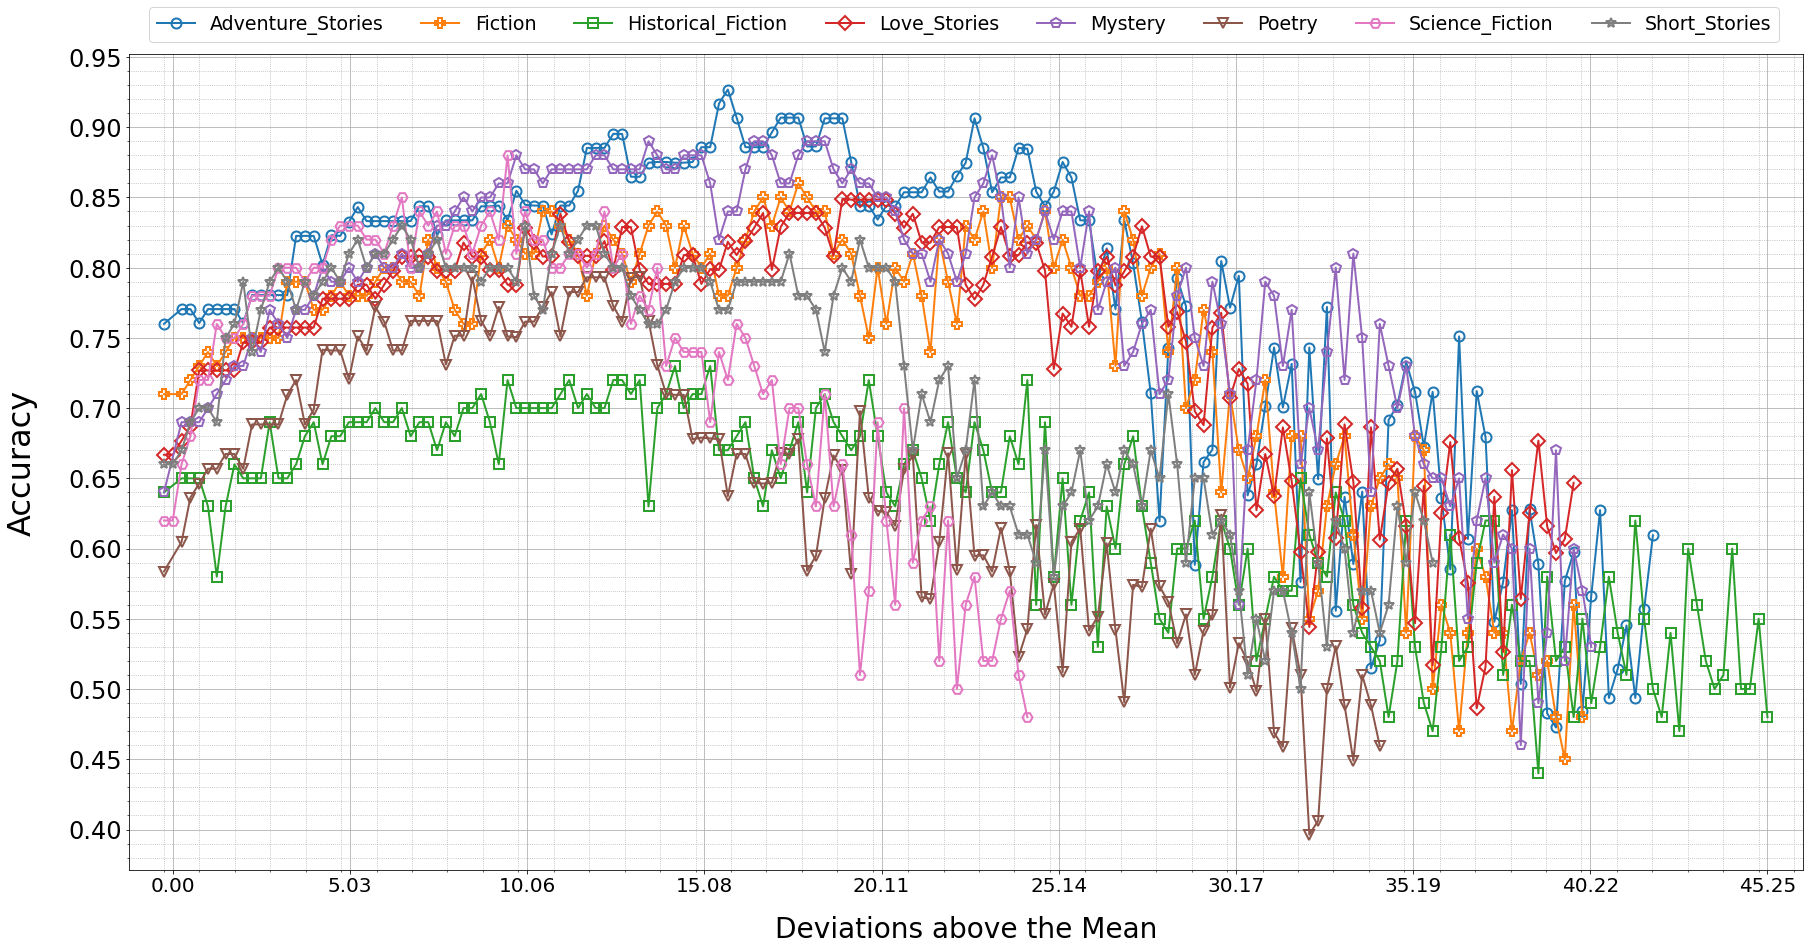

In [27]:
uni_reduced_acc = fr.plot_exhausted(uni_exh)

### Bigram

In [28]:
bi_exh, bi_weights_reduced = fr.reduce_features(bigram_weights, "Bigram", og_acc=bigram_acc)

Adventure_Stories exhausted at 73.0 deviations above the mean
Fiction exhausted at 62.0 deviations above the mean
Historical_Fiction exhausted at 63.5 deviations above the mean
Love_Stories exhausted at 63.5 deviations above the mean
Mystery exhausted at 52.75 deviations above the mean
Poetry exhausted at 51.5 deviations above the mean
Science_Fiction exhausted at 30.0 deviations above the mean
Short_Stories exhausted at 63.75 deviations above the mean



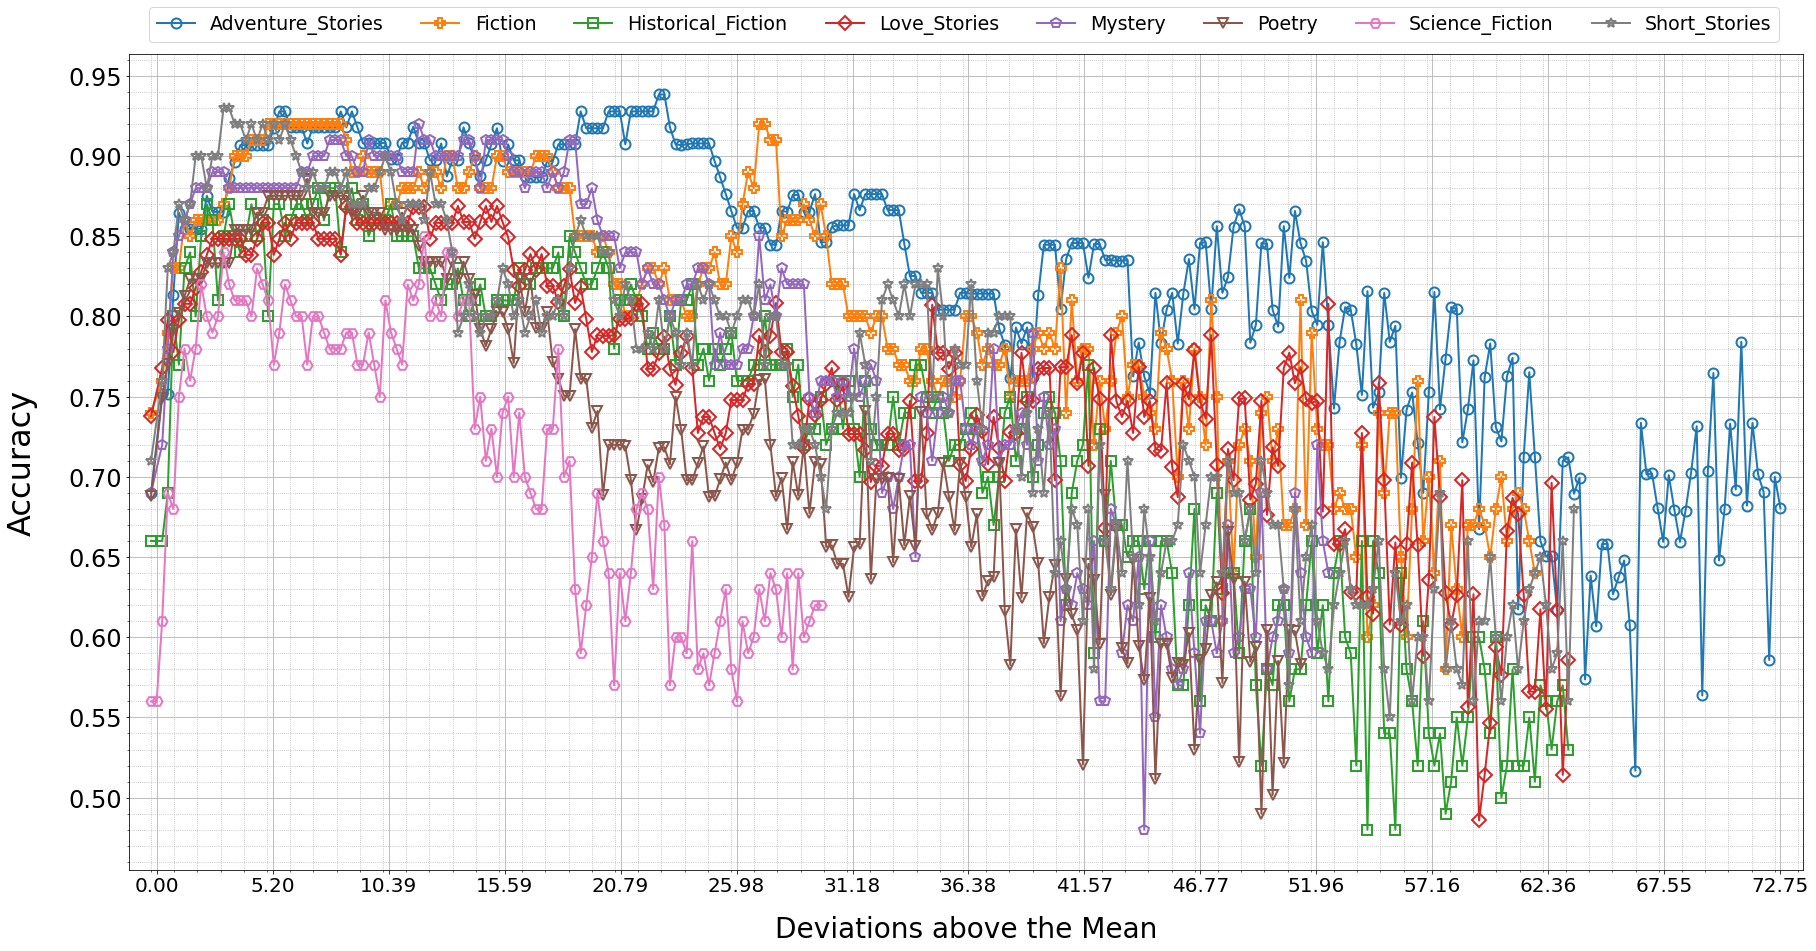

In [29]:
bi_reduced_acc = fr.plot_exhausted(bi_exh)

### POS

In [30]:
pos_exh, pos_weights_reduced = fr.reduce_features(pos_weights, "POS", og_acc=pos_acc)

Adventure_Stories exhausted at 2.0 deviations above the mean
Fiction exhausted at 1.75 deviations above the mean
Historical_Fiction exhausted at 1.5 deviations above the mean
Love_Stories exhausted at 1.75 deviations above the mean
Mystery exhausted at 1.75 deviations above the mean
Poetry exhausted at 1.5 deviations above the mean
Science_Fiction exhausted at 1.5 deviations above the mean
Short_Stories exhausted at 2.25 deviations above the mean



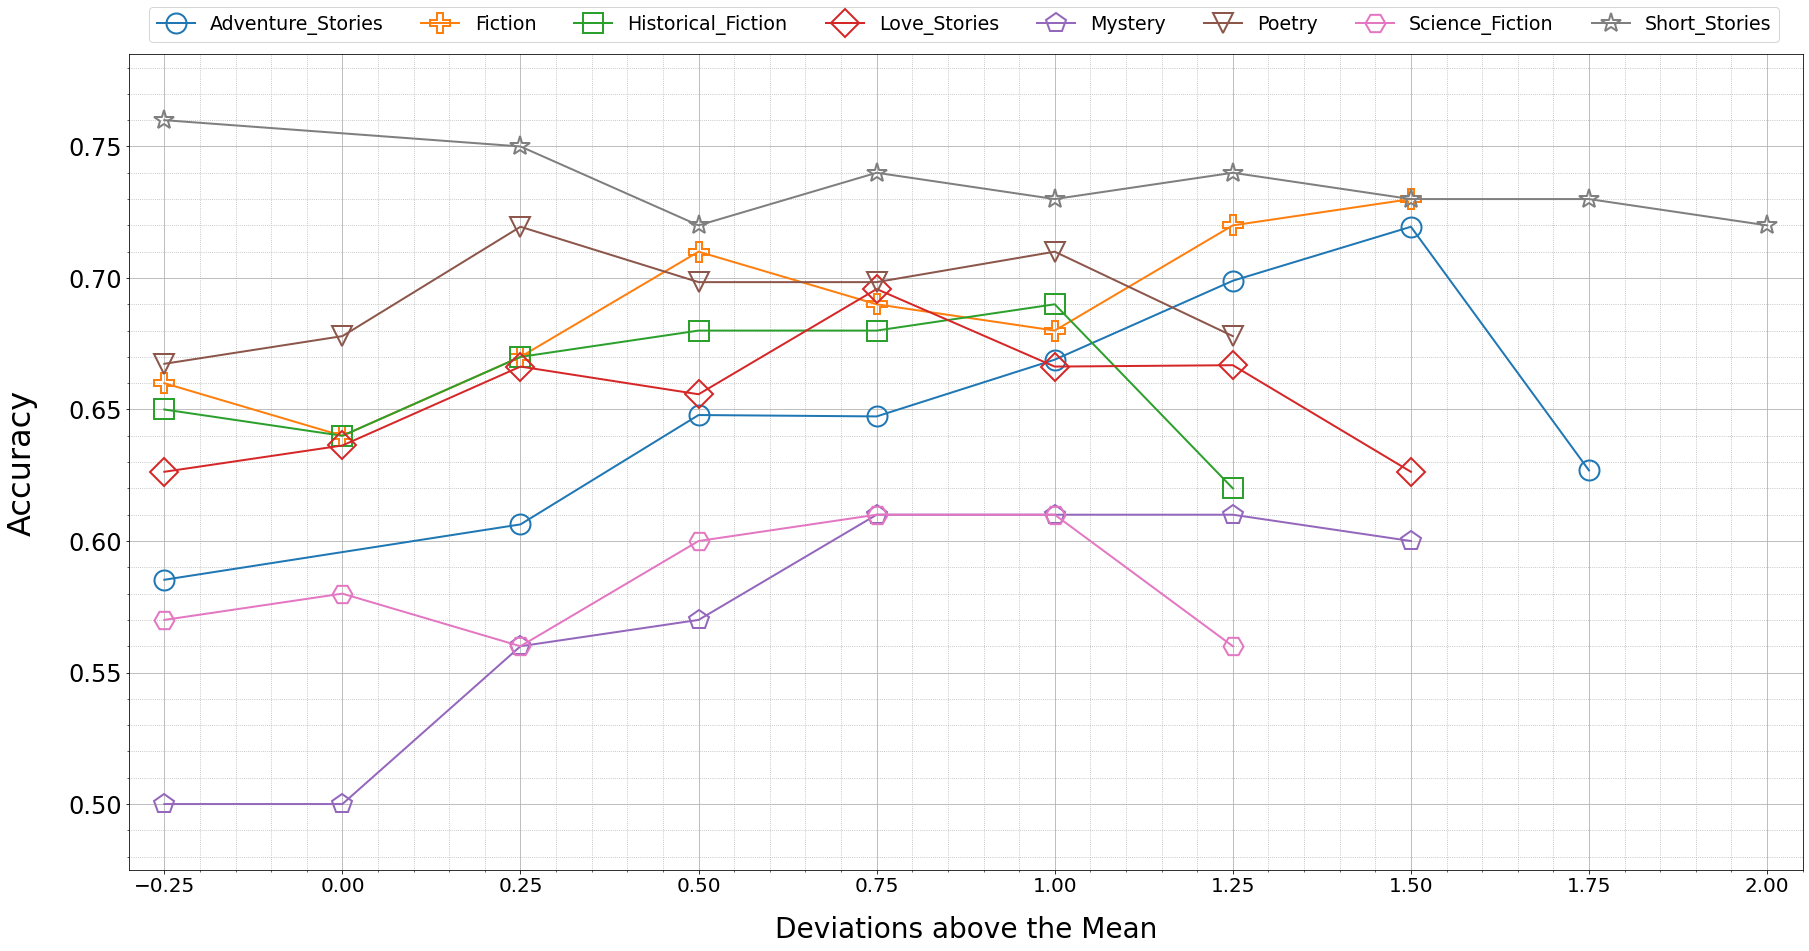

In [31]:
pos_reduced_acc = fr.plot_exhausted(pos_exh, markersize=20)

### Phrasal

In [49]:
phrasal_exh, phrasal_weights_reduced = fr.reduce_features(phrasal_weights, "Phrasal", og_acc=phrasal_acc)

Adventure_Stories exhausted at 0.75 deviations above the mean
Fiction exhausted at 1.0 deviations above the mean
Historical_Fiction exhausted at 1.0 deviations above the mean
Love_Stories exhausted at 1.0 deviations above the mean
Mystery exhausted at 1.25 deviations above the mean
Poetry exhausted at 1.25 deviations above the mean
Science_Fiction exhausted at 0.75 deviations above the mean
Short_Stories exhausted at 1.0 deviations above the mean



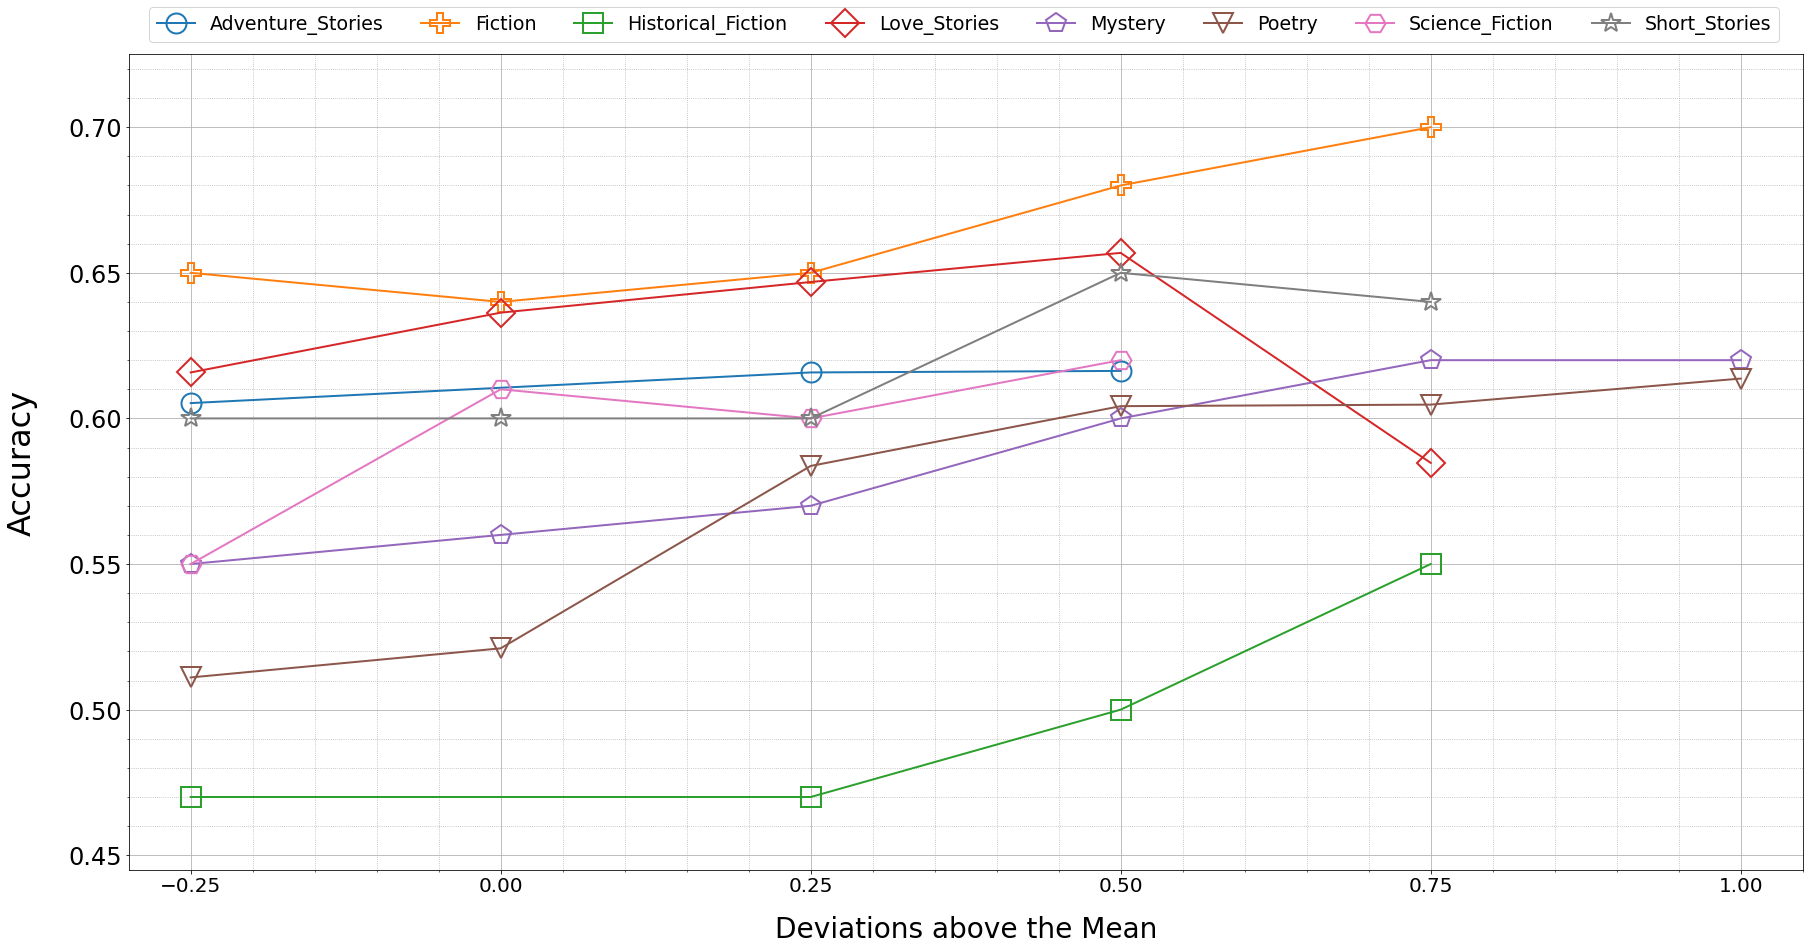

In [50]:
phrasal_reduced_acc = fr.plot_exhausted(phrasal_exh, markersize=20)

### $\Gamma$

In [32]:
lex_exh, lex_weights_reduced = fr.reduce_features(lex_weights, "lex", og_acc=lex_acc)

Adventure_Stories exhausted at 11.75 deviations above the mean
Fiction exhausted at 11.25 deviations above the mean
Historical_Fiction exhausted at 9.25 deviations above the mean
Love_Stories exhausted at 12.0 deviations above the mean
Mystery exhausted at 13.0 deviations above the mean
Poetry exhausted at 12.75 deviations above the mean
Science_Fiction exhausted at 18.75 deviations above the mean
Short_Stories exhausted at 31.75 deviations above the mean



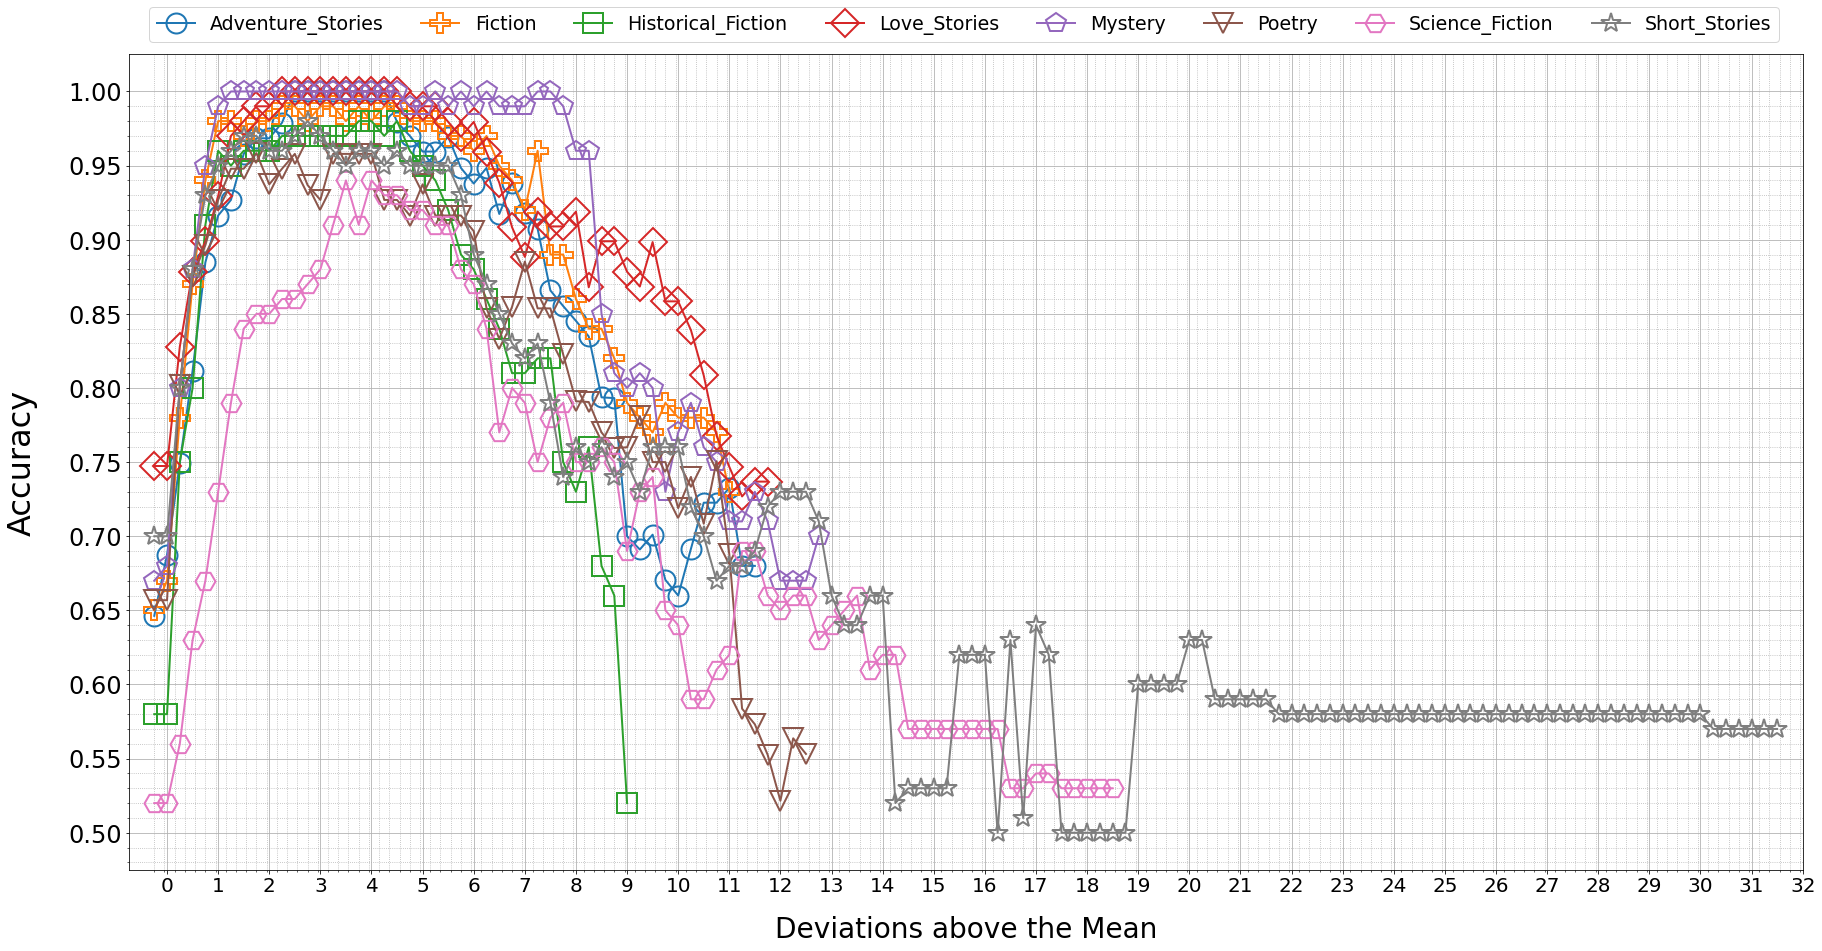

In [33]:
lex_reduced_acc = fr.plot_exhausted(lex_exh, markersize=20)

### $\Gamma^G$

In [34]:
lexg_exh, lexg_weights_reduced = fr.reduce_features(lexg_weights, "lexg", og_acc=lexg_acc)

Adventure_Stories exhausted at 13.0 deviations above the mean
Fiction exhausted at 13.0 deviations above the mean
Historical_Fiction exhausted at 10.75 deviations above the mean
Love_Stories exhausted at 13.0 deviations above the mean
Mystery exhausted at 14.75 deviations above the mean
Poetry exhausted at 16.0 deviations above the mean
Science_Fiction exhausted at 23.25 deviations above the mean
Short_Stories exhausted at 30.25 deviations above the mean



c:\python37\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


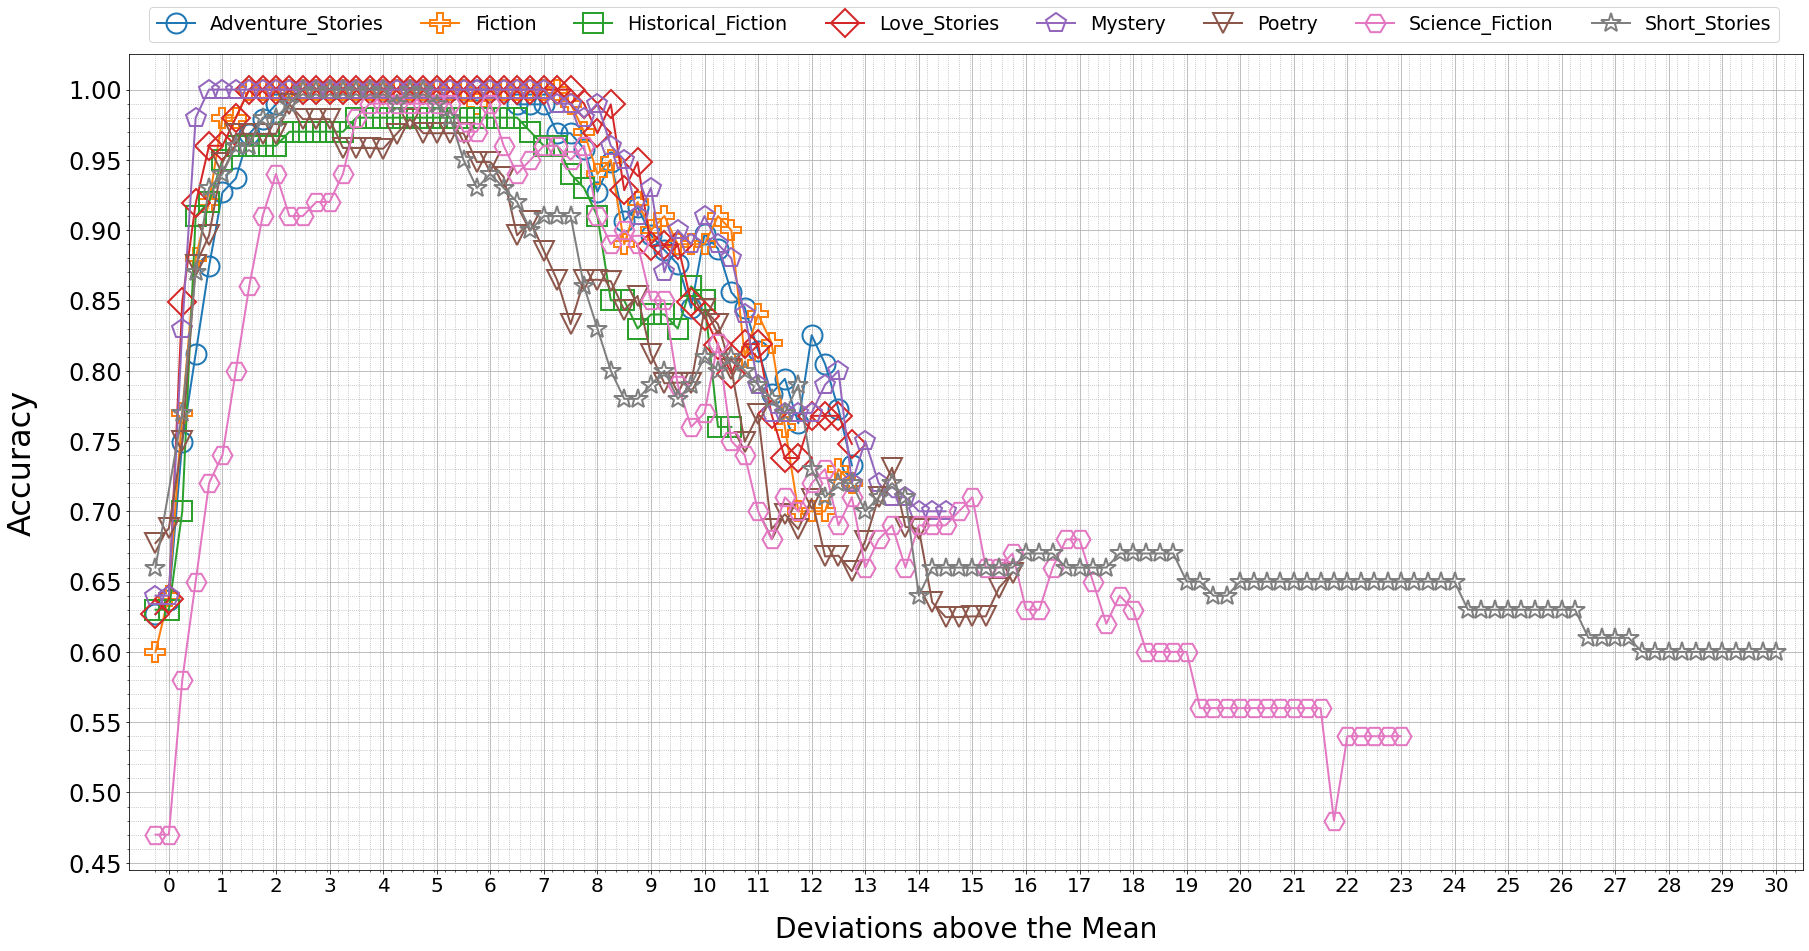

In [35]:
lexg_reduced_acc = fr.plot_exhausted(lexg_exh, markersize=20)

### $\gamma$

In [36]:
nonlex_exh, nonlex_weights_reduced = fr.reduce_features(nonlex_weights, "nonlex", og_acc=nonlex_acc)

Adventure_Stories best param at 2.5 deviations above the mean
Fiction best param at 2.25 deviations above the mean
Historical_Fiction exhausted at 10.75 deviations above the mean
Love_Stories best param at 1.75 deviations above the mean
Mystery best param at 1.75 deviations above the mean
Poetry exhausted at 15.25 deviations above the mean
Science_Fiction exhausted at 20.25 deviations above the mean
Short_Stories exhausted at 28.25 deviations above the mean



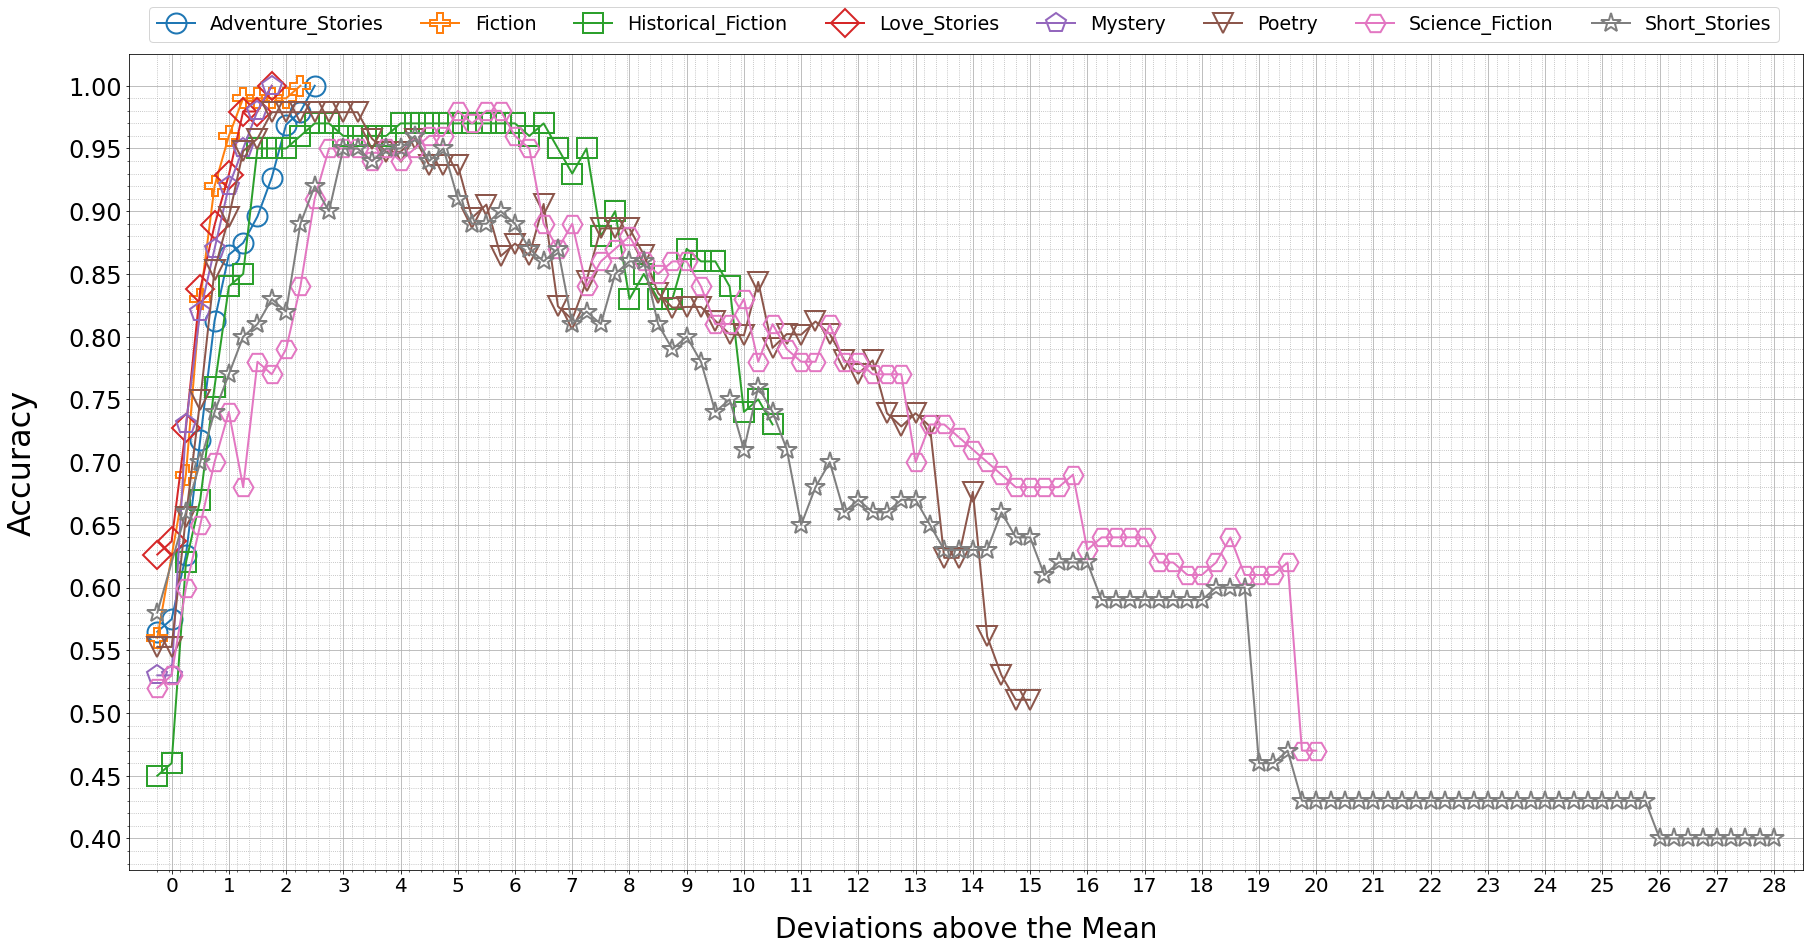

In [37]:
nonlex_reduced_acc = fr.plot_exhausted(nonlex_exh, markersize=20)

### $\gamma^G$

In [38]:
nonlexg_exh, nonlexg_weights_reduced = fr.reduce_features(nonlexg_weights, "nonlexg", og_acc=nonlexg_acc)

Adventure_Stories best param at 2.25 deviations above the mean
Fiction best param at 1.5 deviations above the mean
Historical_Fiction exhausted at 12.75 deviations above the mean
Love_Stories best param at 1.75 deviations above the mean
Mystery best param at 1.75 deviations above the mean
Poetry exhausted at 16.25 deviations above the mean
Science_Fiction best param at 5.25 deviations above the mean
Short_Stories exhausted at 29.75 deviations above the mean



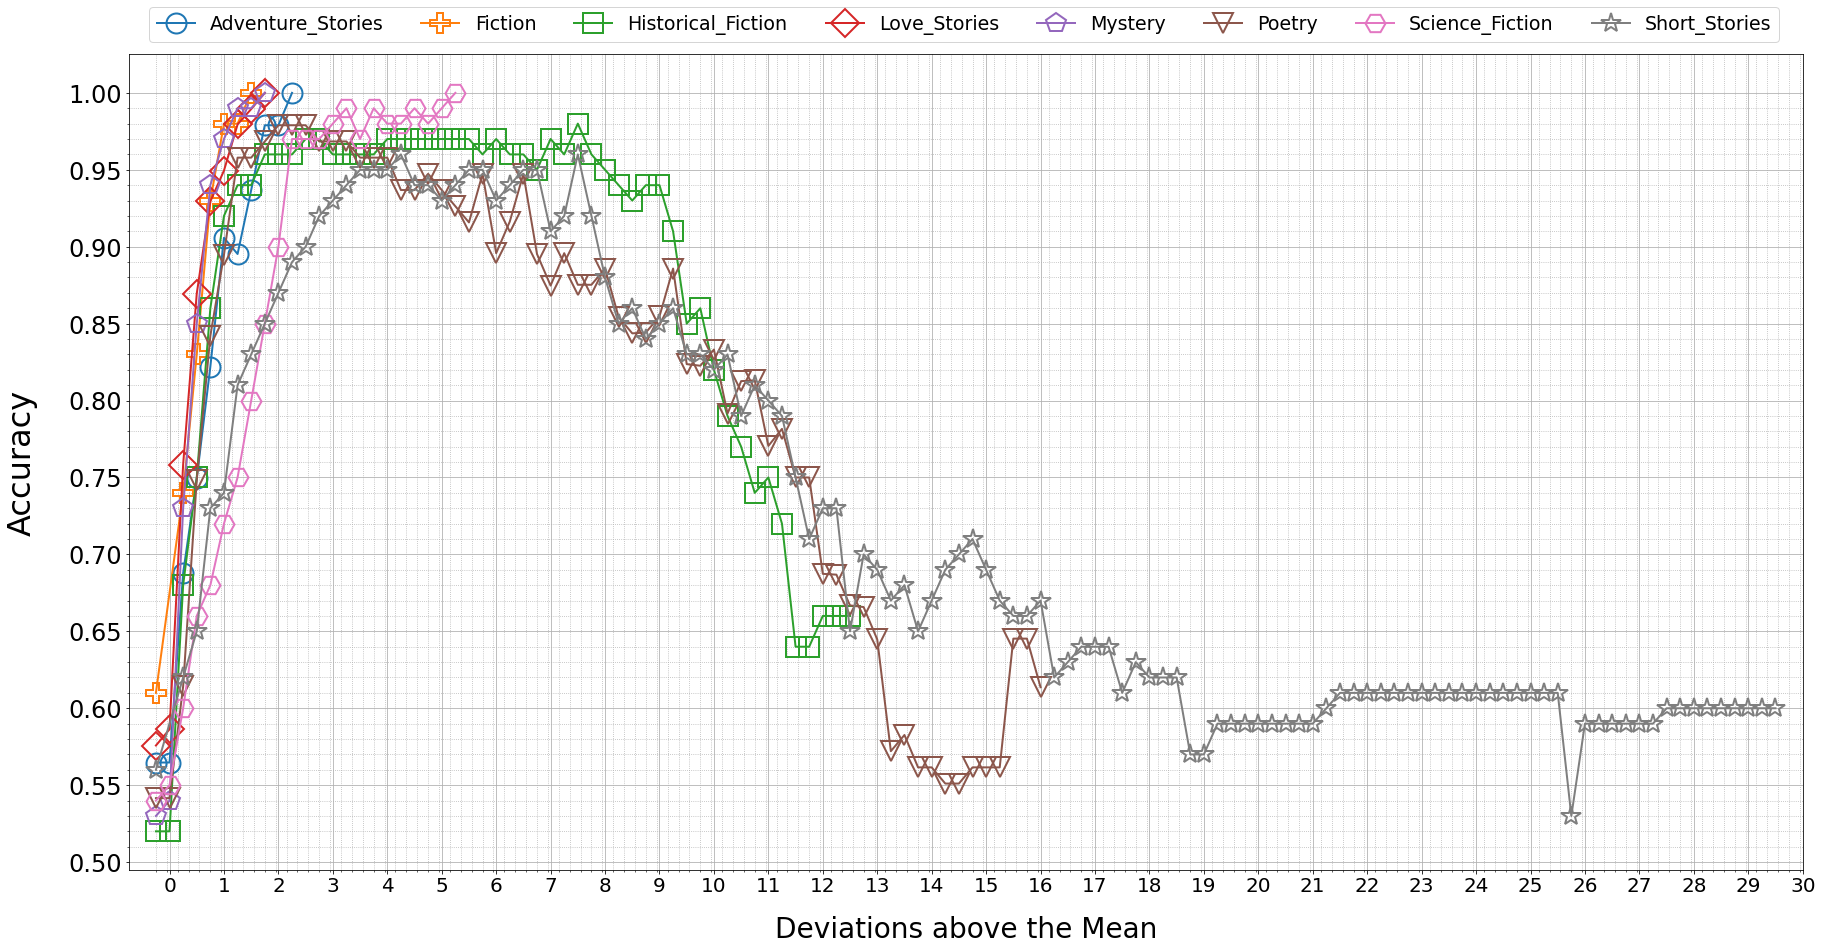

In [39]:
nonlexg_reduced_acc = fr.plot_exhausted(nonlexg_exh, markersize=20)

### Roget

In [40]:
roget_exh, roget_rw = fr.reduce_features(roget_weights, "Roget", og_acc=roget_acc)

Adventure_Stories exhausted at 4.5 deviations above the mean
Fiction exhausted at 4.0 deviations above the mean
Historical_Fiction exhausted at 3.25 deviations above the mean
Love_Stories exhausted at 3.5 deviations above the mean
Mystery exhausted at 3.5 deviations above the mean
Poetry exhausted at 3.75 deviations above the mean
Science_Fiction exhausted at 3.75 deviations above the mean
Short_Stories exhausted at 4.0 deviations above the mean



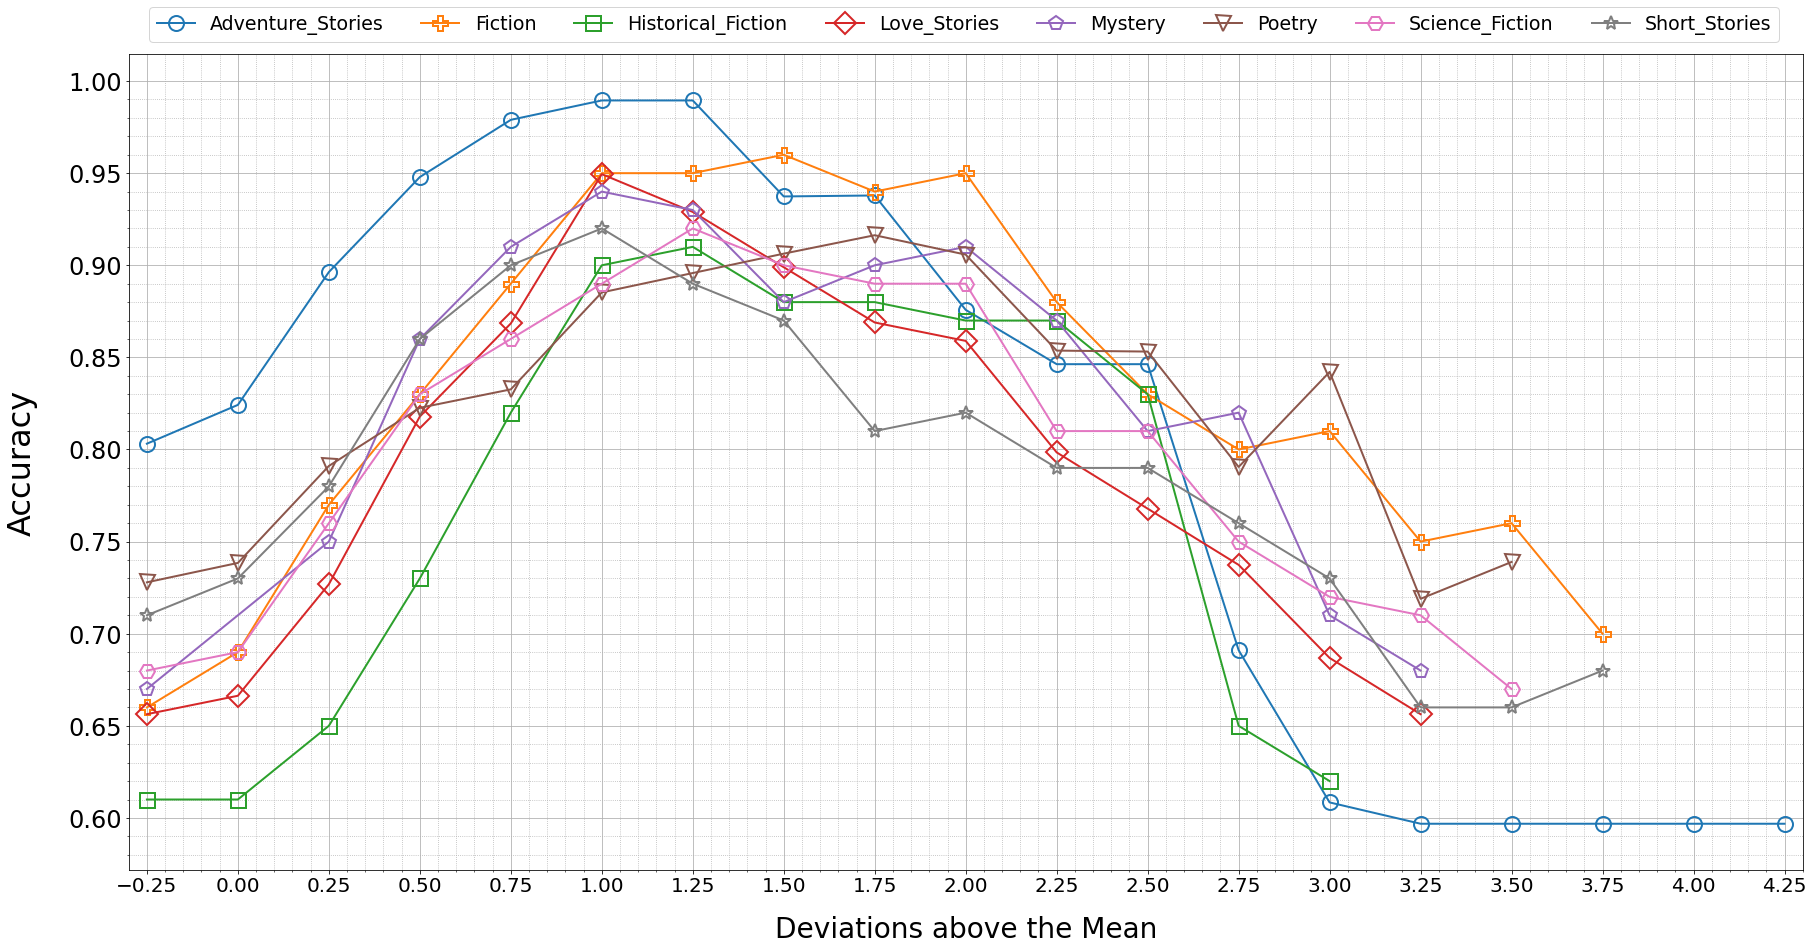

In [41]:
roget_reduced_acc = fr.plot_exhausted(roget_exh, markersize=15)

### WordNet

In [42]:
wn_exh, wn_rw = fr.reduce_features(wordnet_weights, "WordNet", og_acc=wordnet_acc)

Adventure_Stories best param at 2.0 deviations above the mean
Fiction best param at 3.5 deviations above the mean
Historical_Fiction exhausted at 7.75 deviations above the mean
Love_Stories best param at 1.75 deviations above the mean
Mystery best param at 1.0 deviations above the mean
Poetry exhausted at 9.75 deviations above the mean
Science_Fiction exhausted at 12.25 deviations above the mean
Short_Stories exhausted at 12.5 deviations above the mean



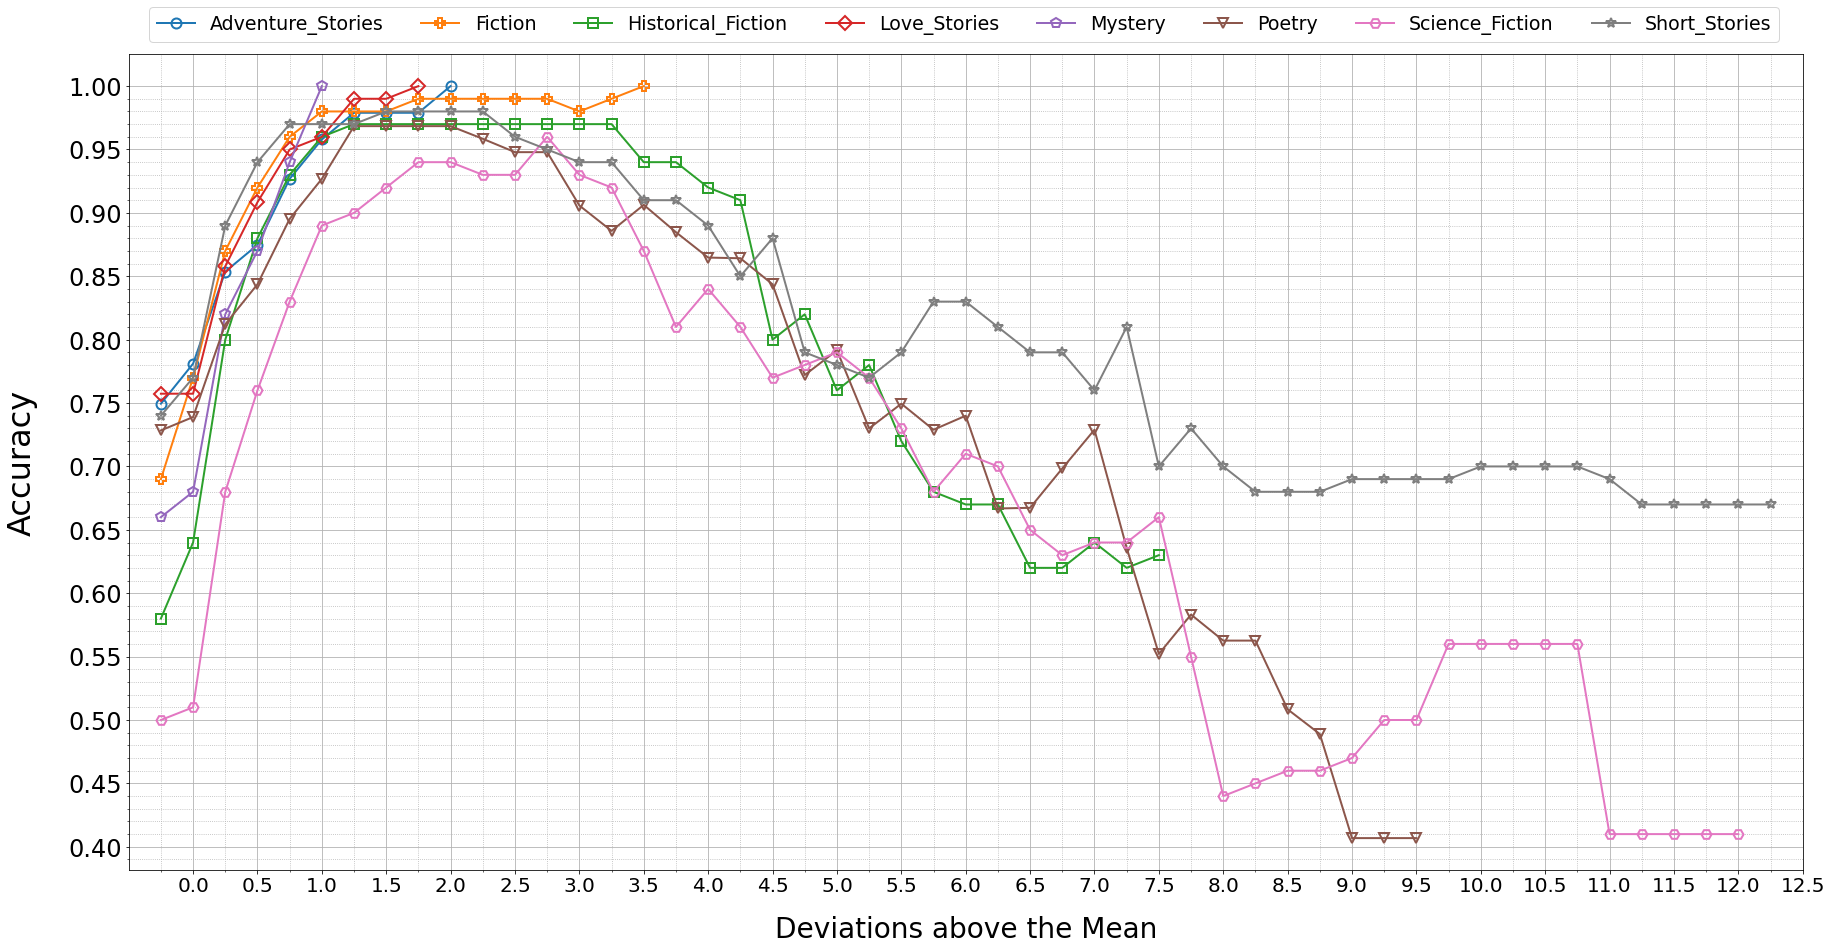

In [43]:
wn_reduced_acc = fr.plot_exhausted(wn_exh)

### LIWC

In [44]:
liwc_exh, liwc_weights_reduced = fr.reduce_features(liwc_weights, "LIWC", og_acc=liwc_acc)

Adventure_Stories exhausted at 1.0 deviations above the mean
Fiction exhausted at 1.0 deviations above the mean
Historical_Fiction exhausted at 1.0 deviations above the mean
Love_Stories exhausted at 1.25 deviations above the mean
Mystery exhausted at 1.0 deviations above the mean
Poetry exhausted at 1.5 deviations above the mean
Science_Fiction exhausted at 0.25 deviations above the mean
Short_Stories exhausted at 1.0 deviations above the mean



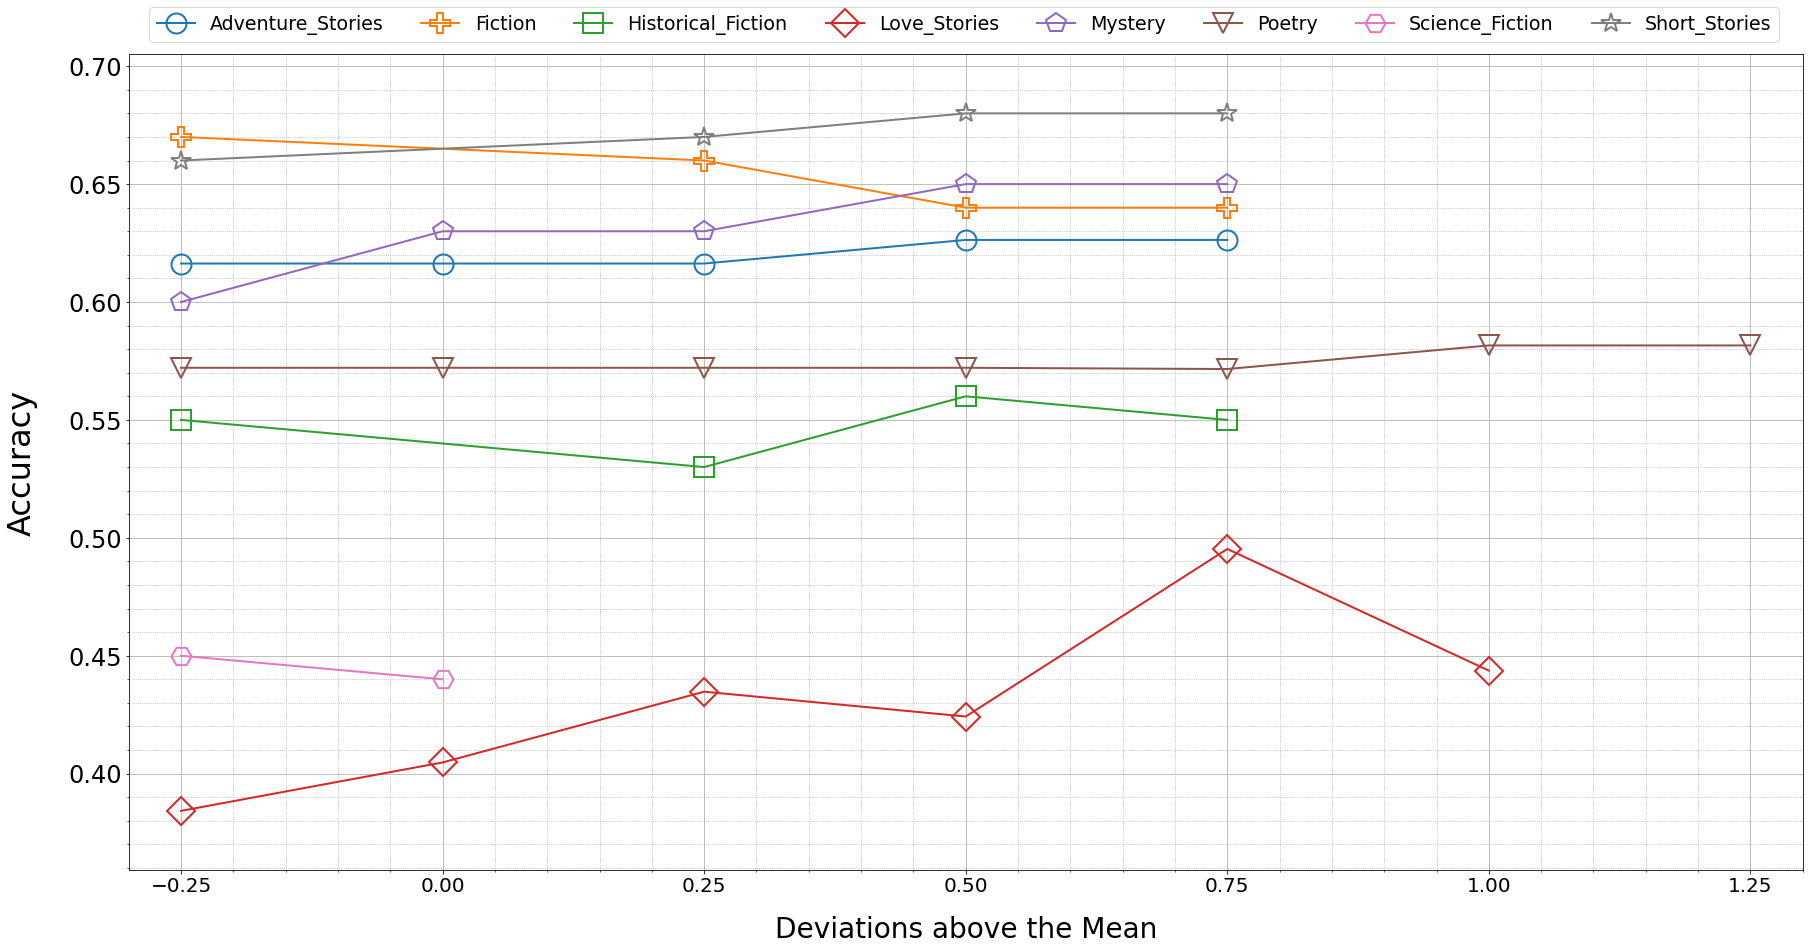

In [45]:
liwc_reduced_acc = fr.plot_exhausted(liwc_exh, markersize=20)

# Comparison Plot

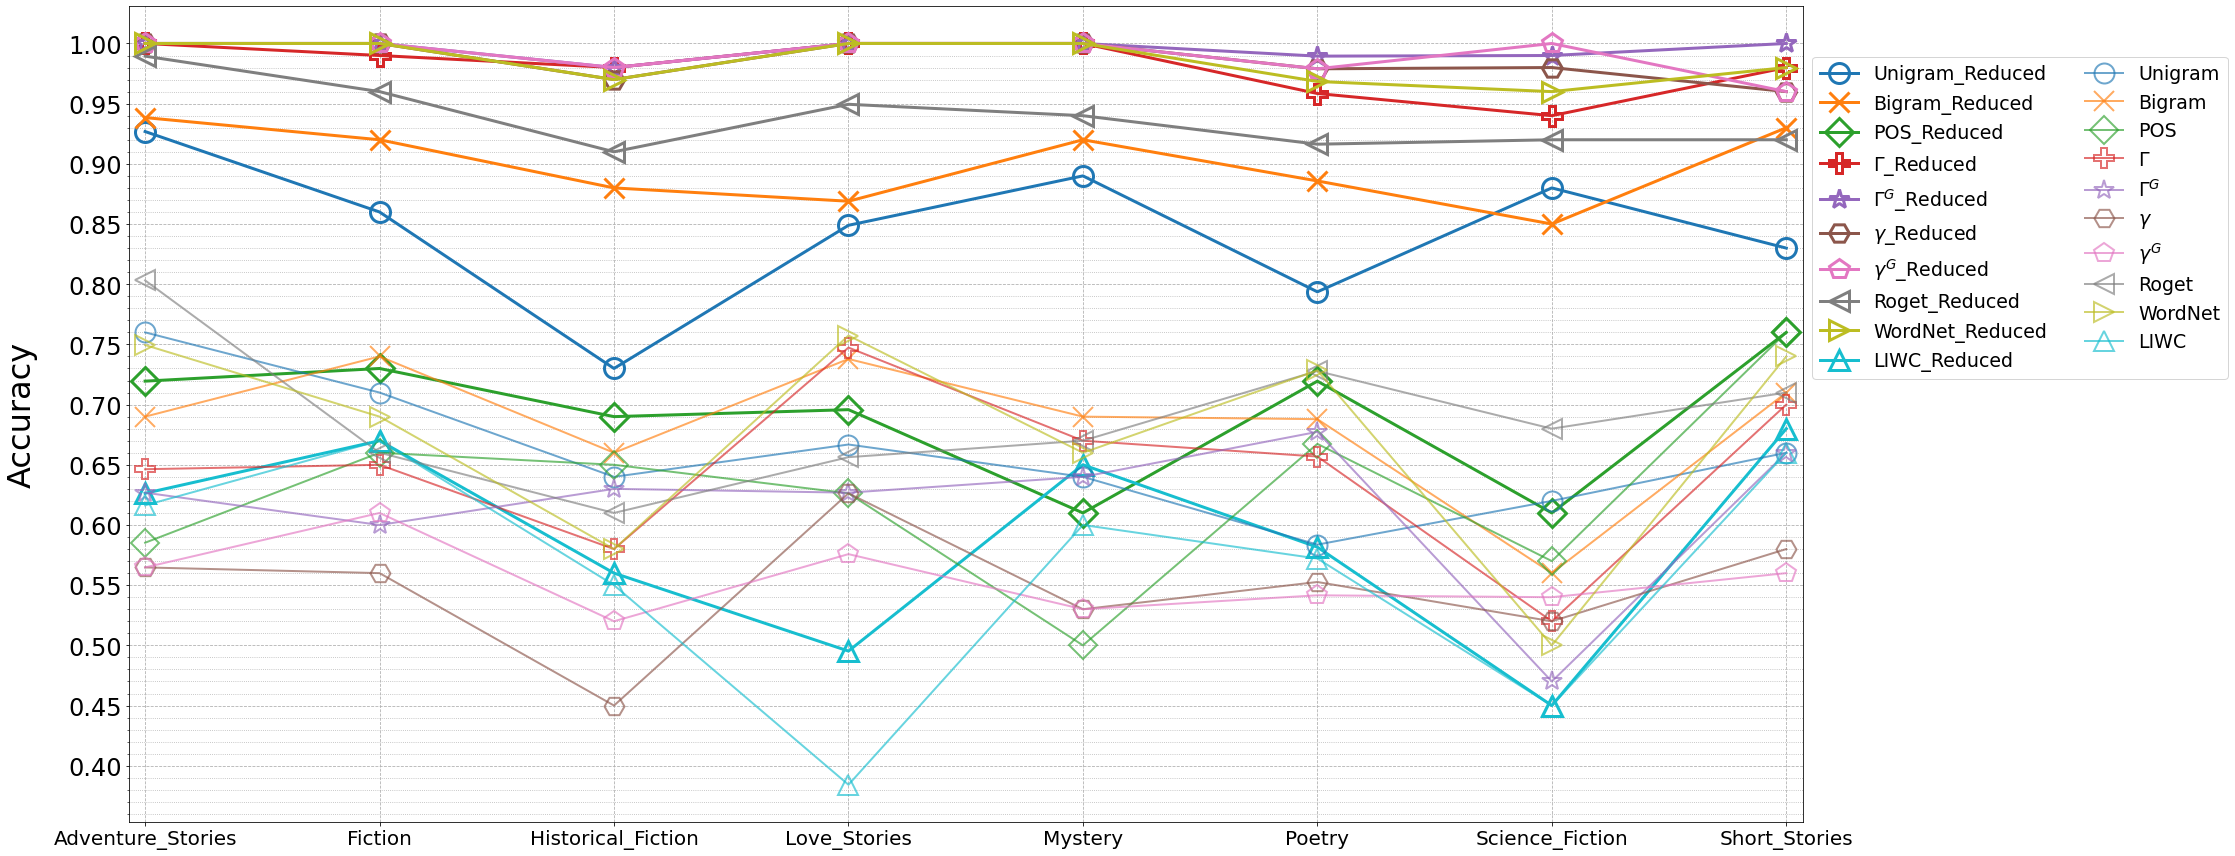

In [47]:
reduced_accs = [uni_reduced_acc, bi_reduced_acc, pos_reduced_acc, lex_reduced_acc, lexg_reduced_acc,
                nonlex_reduced_acc, nonlexg_reduced_acc, roget_reduced_acc, wn_reduced_acc, liwc_reduced_acc]

comp_colors = create_cmap(plt.cm.tab10, [acc["Model Name"].unique()[0] for acc in no_reduc_accs[:-1]])
markers = ["o", "x", "D", "P", "*", "H", "p", "<", ">", "^", "h"]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30,15))

for nored_acc, red_acc, m in zip(no_reduc_accs[:-1], reduced_accs, markers):
    nored_model_name = nored_acc["Model Name"].unique()[0]
    red_model_name = nored_model_name + "_Reduced"
    red_acc[red_acc["Genre"] != "Average"].plot(x="Genre", y="Accuracy", ax=axes, rot=0,
                                                      color=comp_colors[nored_model_name], marker=m,
                                                      markersize=20, markeredgewidth=3, fillstyle="none",
                                                      linewidth=3, label=red_model_name)

for nored_acc, red_acc, m in zip(no_reduc_accs[:-1], reduced_accs, markers):
    nored_model_name = nored_acc["Model Name"].unique()[0]
    red_model_name = nored_model_name + "_Reduced"
    nored_acc[nored_acc["Genre"] != "Average"].plot(x="Genre", y="Accuracy", ax=axes, rot=0,
                                                    color=comp_colors[nored_model_name], marker=m,
                                                    markersize=20, markeredgewidth=2, fillstyle="none",
                                                    linewidth=2, alpha=0.65)

setup_axis(axes, x_ticklabels=NEW_GENRES, ylabel="Accuracy", minor_grid=":")

axes.legend([acc["Model Name"].unique()[0] + "_Reduced" for acc in no_reduc_accs[:-1]] + [acc["Model Name"].unique()[0] for acc in no_reduc_accs[:-1]],
            bbox_to_anchor=(1, 0.95), fontsize=19, ncol=2)
plt.margins(x=0.01, y=0.05)
plt.show()